# CFA Analysis

In [25]:
def estimate_cfa_pattern(image_path):
    """Estimates the CFA pattern based on color channel intensities."""
    red, green, blue = load_and_split_channels(image_path)

    if red is None:
        return

    # Compute mean intensity per channel
    mean_r, mean_g, mean_b = np.mean(red), np.mean(green), np.mean(blue)
    print(f"🔴 Red Mean: {mean_r:.2f}, 🟢 Green Mean: {mean_g:.2f}, 🔵 Blue Mean: {mean_b:.2f}")

    # CFA Pattern Estimation
    if mean_r > mean_b:
        if mean_g > mean_r:
            print("✅ Detected CFA Pattern: GRBG")
        else:
            print("✅ Detected CFA Pattern: RGGB")
    else:
        if mean_g > mean_b:
            print("✅ Detected CFA Pattern: GBRG")
        else:
            print("✅ Detected CFA Pattern: BGGR")

# Example usage
estimate_cfa_pattern(r"C:\Users\Ananya\mini project\archive\Source Camera Identification_A Custom Dataset\custom\test\D36\0063.png")


🔴 Red Mean: 111.58, 🟢 Green Mean: 100.43, 🔵 Blue Mean: 97.06
✅ Detected CFA Pattern: RGGB


In [27]:
def estimate_cfa_pattern(image_path):
    """Estimates the CFA pattern based on color channel intensities."""
    red, green, blue = load_and_split_channels(image_path)

    if red is None:
        return

    # Compute mean intensity per channel
    mean_r, mean_g, mean_b = np.mean(red), np.mean(green), np.mean(blue)
    print(f"🔴 Red Mean: {mean_r:.2f}, 🟢 Green Mean: {mean_g:.2f}, 🔵 Blue Mean: {mean_b:.2f}")

    # CFA Pattern Estimation
    if mean_r > mean_b:
        if mean_g > mean_r:
            print("✅ Detected CFA Pattern: GRBG")
        else:
            print("✅ Detected CFA Pattern: RGGB")
    else:
        if mean_g > mean_b:
            print("✅ Detected CFA Pattern: GBRG")
        else:
            print("✅ Detected CFA Pattern: BGGR")

# Example usage
estimate_cfa_pattern(r"C:\Users\Ananya\mini project\archive\Source Camera Identification_A Custom Dataset\flat\train\D10\D10_I_flat_0023.jpg")


🔴 Red Mean: 78.90, 🟢 Green Mean: 115.89, 🔵 Blue Mean: 172.74
✅ Detected CFA Pattern: BGGR


# PRNU Analysis

In [6]:
import os
import numpy as np
import cv2
import pywt
import matplotlib.pyplot as plt
from scipy.signal import wiener

def extract_prnu(image_path):
    """Extracts PRNU noise from an image using wavelet-based denoising."""
    try:
        # Load image in grayscale
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            raise ValueError(f"Could not load image: {image_path}")

        # Convert to float and normalize
        image = image.astype(np.float32) / 255.0

        # Apply Discrete Wavelet Transform (DWT) for noise extraction
        coeffs = pywt.wavedec2(image, 'db2', level=2)
        coeffs[0] = np.zeros_like(coeffs[0])  # Remove approximation coefficients

        # Reconstruct PRNU noise pattern
        noise = pywt.waverec2(coeffs, 'db2')

        # Apply Wiener filter to reduce artifacts
        noise = wiener(noise, (5, 5))

        # Normalize PRNU pattern for better visualization
        noise -= np.mean(noise)
        noise /= (np.std(noise) + 1e-8)  # Avoid division by zero

        return noise

    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

def process_prnu_in_folder(main_folder):
    """Computes the average PRNU pattern for each subfolder and saves it."""
    for root, _, files in os.walk(main_folder):
        prnu_list = []  # Store PRNU patterns
        target_shape = None

        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):  # Supported formats
                image_path = os.path.join(root, file)
                prnu_noise = extract_prnu(image_path)

                if prnu_noise is not None:
                    if target_shape is None:
                        target_shape = prnu_noise.shape  # Set target shape from the first image
                    else:
                        # Resize to match the target shape
                        prnu_noise = cv2.resize(prnu_noise, (target_shape[1], target_shape[0]))

                    prnu_list.append(prnu_noise)
                    print(f"✅ Processed PRNU for: {file}")

        if prnu_list:
            # Compute average PRNU pattern
            avg_prnu = np.mean(prnu_list, axis=0)

            # Define output paths
            prnu_npy_path = os.path.join(root, "average_prnu.npy")
            prnu_png_path = os.path.join(root, "average_prnu.png")

            # Save PRNU pattern as NumPy array
            np.save(prnu_npy_path, avg_prnu)
            print(f"📂 Saved PRNU NumPy file: {prnu_npy_path}")

            # Save PRNU visualization as an image
            plt.figure(figsize=(6, 6))
            plt.imshow(avg_prnu, cmap='gray')
            plt.colorbar()
            plt.title("Average PRNU Pattern")
            plt.axis("off")
            plt.savefig(prnu_png_path, dpi=300)
            plt.close()
            print(f"🖼️ Saved PRNU Image: {prnu_png_path}")

        else:
            print(f"⚠️ No valid images found in {root}, skipping PRNU computation.")
            
if __name__ == "__main__":
    main_folder = r"C:\Users\Ananya\mini project\archive\Source Camera Identification_A Custom Dataset\flat\train\D05" # Change this to your directory
    process_prnu_in_folder(main_folder)

✅ Processed PRNU for: D05_I_flat_0001.jpg
✅ Processed PRNU for: D05_I_flat_0005.jpg
✅ Processed PRNU for: D05_I_flat_0006.jpg
✅ Processed PRNU for: D05_I_flat_0007.jpg
✅ Processed PRNU for: D05_I_flat_0008.jpg
✅ Processed PRNU for: D05_I_flat_0009.jpg
✅ Processed PRNU for: D05_I_flat_0010.jpg
✅ Processed PRNU for: D05_I_flat_0011.jpg
✅ Processed PRNU for: D05_I_flat_0013.jpg
✅ Processed PRNU for: D05_I_flat_0014.jpg
✅ Processed PRNU for: D05_I_flat_0015.jpg
✅ Processed PRNU for: D05_I_flat_0016.jpg
✅ Processed PRNU for: D05_I_flat_0017.jpg
✅ Processed PRNU for: D05_I_flat_0018.jpg
✅ Processed PRNU for: D05_I_flat_0019.jpg
✅ Processed PRNU for: D05_I_flat_0020.jpg
✅ Processed PRNU for: D05_I_flat_0021.jpg
✅ Processed PRNU for: D05_I_flat_0022.jpg
✅ Processed PRNU for: D05_I_flat_0024.jpg
✅ Processed PRNU for: D05_I_flat_0025.jpg
✅ Processed PRNU for: D05_I_flat_0026.jpg
✅ Processed PRNU for: D05_I_flat_0027.jpg
✅ Processed PRNU for: D05_I_flat_0028.jpg
✅ Processed PRNU for: D05_I_flat_0

In [3]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: opencv-python in c:\users\ananya\anaconda3\lib\site-packages (4.11.0.86)



In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load PRNU patterns
prnu_1 = np.load(r'C:\Users\Ananya\mini project\archive\Source Camera Identification_A Custom Dataset\flat\train\D02\average_prnu.npy')
prnu_2 = np.load(r'C:\Users\Ananya\mini project\archive\Source Camera Identification_A Custom Dataset\flat\train\D05\average_prnu.npy')

print(f"✅ Loaded PRNU 1 with shape: {prnu_1.shape}")
print(f"✅ Loaded PRNU 2 with shape: {prnu_2.shape}")


✅ Loaded PRNU 1 with shape: (1800, 1800)
✅ Loaded PRNU 2 with shape: (2448, 3264)


In [8]:
if prnu_1.shape != prnu_2.shape:
    print("❌ PRNU shapes do not match! Resizing needed.")
    from skimage.transform import resize
    prnu_2 = resize(prnu_2, prnu_1.shape)
    print(f"✅ PRNU 2 resized to match PRNU 1: {prnu_2.shape}")


❌ PRNU shapes do not match! Resizing needed.
✅ PRNU 2 resized to match PRNU 1: (1800, 1800)


In [12]:
# Flatten the matrices
prnu_1_flat = prnu_1.flatten()
prnu_2_flat = prnu_2.flatten()

# Compute Pearson correlation
correlation, _ = pearsonr(prnu_1_flat, prnu_2_flat)
print(f"📊 Pearson Correlation: {correlation:.4f}")

mse = np.mean((prnu_1 - prnu_2) ** 2)
print(f"📉 Mean Squared Error: {mse:.6f}")

from skimage.metrics import structural_similarity as ssim

ssim_value, _ = ssim(prnu_1, prnu_2, full=True)
print(f"🖼️ Structural Similarity Index (SSIM): {ssim_value:.4f}")


📊 Pearson Correlation: 0.0029
📉 Mean Squared Error: 0.081059
🖼️ Structural Similarity Index (SSIM): 0.0472


# Color Consistency Comparison

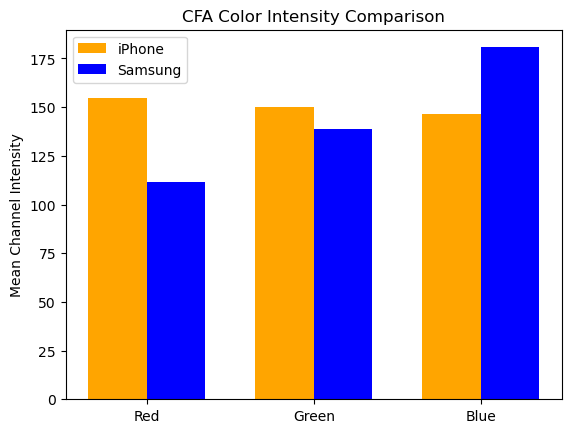

In [16]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def analyze_cfa(folder_path, num_samples=10):
    r_list, g_list, b_list = [], [], []

    count = 0
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            if img is None:
                continue

            img = cv2.resize(img, (256, 256))  # Standardize size
            b, g, r = cv2.split(img)
            r_list.append(np.mean(r))
            g_list.append(np.mean(g))
            b_list.append(np.mean(b))

            count += 1
            if count >= num_samples:
                break

    return np.mean(r_list), np.mean(g_list), np.mean(b_list), np.std(r_list), np.std(g_list), np.std(b_list)

# Example folders
iphone_folder =  r"C:\Users\Ananya\mini project\archive\Source Camera Identification_A Custom Dataset\flat\train\D02"
samsung_folder =  r"C:\Users\Ananya\mini project\archive\Source Camera Identification_A Custom Dataset\flat\train\D01"

iphone_stats = analyze_cfa(iphone_folder)
samsung_stats = analyze_cfa(samsung_folder)

# Compare
labels = ['Red', 'Green', 'Blue']
iphone_means = iphone_stats[:3]
samsung_means = samsung_stats[:3]

x = np.arange(len(labels))
width = 0.35

plt.bar(x - width/2, iphone_means, width, label='iPhone', color='orange')
plt.bar(x + width/2, samsung_means, width, label='Samsung', color='blue')
plt.ylabel('Mean Channel Intensity')
plt.title('CFA Color Intensity Comparison')
plt.xticks(x, labels)
plt.legend()
plt.show()


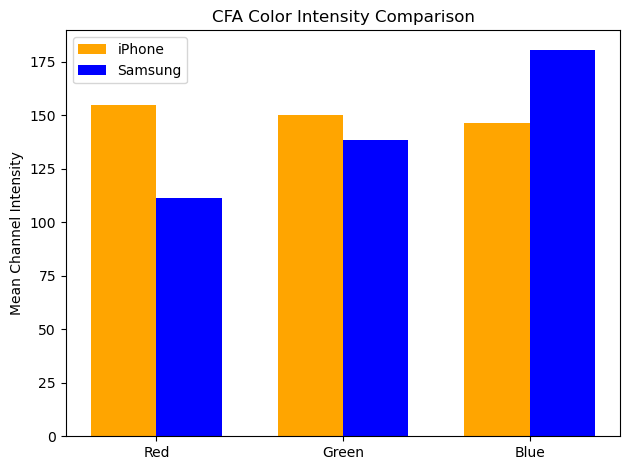

📱 iPhone CFA Pattern → Estimated CFA Dominance: R > B > G
📱 Samsung CFA Pattern → Estimated CFA Dominance: B > R > G


In [17]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def analyze_cfa(folder_path, num_samples=10):
    r_list, g_list, b_list = [], [], []
    cfa_blocks = {'R': 0, 'G': 0, 'B': 0}

    count = 0
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            if img is None:
                continue

            img = cv2.resize(img, (256, 256))
            b, g, r = cv2.split(img)

            r_list.append(np.mean(r))
            g_list.append(np.mean(g))
            b_list.append(np.mean(b))

            # CFA estimation using 2x2 blocks
            for i in range(0, img.shape[0] - 1, 2):
                for j in range(0, img.shape[1] - 1, 2):
                    block_r = np.array([
                        r[i, j],     r[i, j+1],
                        r[i+1, j],   r[i+1, j+1]
                    ])
                    block_g = np.array([
                        g[i, j],     g[i, j+1],
                        g[i+1, j],   g[i+1, j+1]
                    ])
                    block_b = np.array([
                        b[i, j],     b[i, j+1],
                        b[i+1, j],   b[i+1, j+1]
                    ])

                    max_mean = max(np.mean(block_r), np.mean(block_g), np.mean(block_b))
                    if max_mean == np.mean(block_r):
                        cfa_blocks['R'] += 1
                    elif max_mean == np.mean(block_g):
                        cfa_blocks['G'] += 1
                    else:
                        cfa_blocks['B'] += 1

            count += 1
            if count >= num_samples:
                break

    return (
        np.mean(r_list), np.mean(g_list), np.mean(b_list),
        np.std(r_list), np.std(g_list), np.std(b_list),
        cfa_blocks
    )

def infer_cfa_pattern(cfa_counts):
    total = sum(cfa_counts.values())
    for key in cfa_counts:
        cfa_counts[key] = round((cfa_counts[key] / total) * 100, 2)
    sorted_channels = sorted(cfa_counts.items(), key=lambda x: -x[1])
    return f"Estimated CFA Dominance: {sorted_channels[0][0]} > {sorted_channels[1][0]} > {sorted_channels[2][0]}"

# Example folders
iphone_folder =  r"C:\Users\Ananya\mini project\archive\Source Camera Identification_A Custom Dataset\flat\train\D02"
samsung_folder =  r"C:\Users\Ananya\mini project\archive\Source Camera Identification_A Custom Dataset\flat\train\D01"
iphone_stats = analyze_cfa(iphone_folder)
samsung_stats = analyze_cfa(samsung_folder)

iphone_cfa = infer_cfa_pattern(iphone_stats[6])
samsung_cfa = infer_cfa_pattern(samsung_stats[6])

# Compare color means
labels = ['Red', 'Green', 'Blue']
iphone_means = iphone_stats[:3]
samsung_means = samsung_stats[:3]

x = np.arange(len(labels))
width = 0.35

plt.bar(x - width/2, iphone_means, width, label='iPhone', color='orange')
plt.bar(x + width/2, samsung_means, width, label='Samsung', color='blue')
plt.ylabel('Mean Channel Intensity')
plt.title('CFA Color Intensity Comparison')
plt.xticks(x, labels)
plt.legend()
plt.tight_layout()
plt.show()

# Print estimated CFA patterns
print("📱 iPhone CFA Pattern →", iphone_cfa)
print("📱 Samsung CFA Pattern →", samsung_cfa)


In [21]:
import os
import cv2
import numpy as np

def analyze_color_consistency(folder_path, num_samples=10):
    r_means, g_means, b_means = [], [], []

    count = 0
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            if img is None:
                continue

            img = cv2.resize(img, (256, 256))  # Resize for uniformity
            b, g, r = cv2.split(img)

            r_means.append(np.mean(r))
            g_means.append(np.mean(g))
            b_means.append(np.mean(b))

            count += 1
            if count >= num_samples:
                break

    r_mean, g_mean, b_mean = np.mean(r_means), np.mean(g_means), np.mean(b_means)
    r_std, g_std, b_std = np.std(r_means), np.std(g_means), np.std(b_means)

    return (r_mean, g_mean, b_mean), (r_std, g_std, b_std)

# Update these paths to your actual folders
d01_path = r"C:\Users\Ananya\mini project\archive\Source Camera Identification_A Custom Dataset\flat\train\D01"
d05_path = r"C:\Users\Ananya\mini project\archive\Source Camera Identification_A Custom Dataset\flat\train\D05"

d01_means, d01_stds = analyze_color_consistency(d01_path)
d05_means, d05_stds = analyze_color_consistency(d05_path)

# Display results
print("📁 D01 (iPhone 4s):")
print(f"  🔸 Mean RGB: {d01_means}")
print(f"  🔸 Std Dev RGB: {d01_stds} → Color Consistency\n")

print("📁 D05 (iPhone 5c):")
print(f"  🔹 Mean RGB: {d05_means}")
print(f"  🔹 Std Dev RGB: {d05_stds} → Color Consistency")


📁 D01 (iPhone 4s):
  🔸 Mean RGB: (111.6310791015625, 138.63889770507814, 180.7480484008789)
  🔸 Std Dev RGB: (31.914626001712893, 22.550243979880257, 15.505732423796625) → Color Consistency

📁 D05 (iPhone 5c):
  🔹 Mean RGB: (156.02365417480468, 151.44732666015625, 142.3804733276367)
  🔹 Std Dev RGB: (17.549608553090312, 19.090640974900136, 22.005064225511408) → Color Consistency


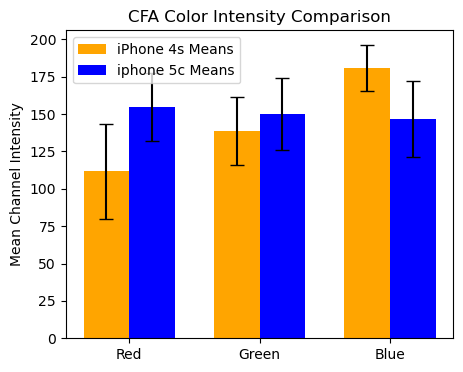

iPhone 4s CFA Estimated Dominance: R > G > B (R=111.63, G=138.64, B=180.75)
iphone 5c CFA Estimated Dominance: B > R > G (R=154.82, G=150.24, B=146.65)


In [27]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def analyze_cfa(folder_path, num_samples=10):
    """Analyzes the CFA pattern by computing the average color intensities (RGB)."""
    r_list, g_list, b_list = [], [], []

    count = 0
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            if img is None:
                continue

            img = cv2.resize(img, (256, 256))  # Standardize size
            b, g, r = cv2.split(img)
            r_list.append(np.mean(r))
            g_list.append(np.mean(g))
            b_list.append(np.mean(b))

            count += 1
            if count >= num_samples:
                break

    # Return the mean and standard deviation of each color channel
    return np.mean(r_list), np.mean(g_list), np.mean(b_list), np.std(r_list), np.std(g_list), np.std(b_list)

def plot_comparison(iphone_stats, samsung_stats):
    """Plot the comparison of CFA results for two phones."""
    labels = ['Red', 'Green', 'Blue']
    
    iphone_means = iphone_stats[:3]
    samsung_means = samsung_stats[:3]
    iphone_stds = iphone_stats[3:]
    samsung_stds = samsung_stats[3:]

    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots(figsize=(5,4))

    # Plot means for each color channel
    ax.bar(x - width/2, iphone_means, width, label='iPhone 4s Means', color='orange', yerr=iphone_stds, capsize=5)
    ax.bar(x + width/2, samsung_means, width, label='iphone 5c Means', color='blue', yerr=samsung_stds, capsize=5)

    ax.set_ylabel('Mean Channel Intensity')
    ax.set_title('CFA Color Intensity Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

# Define paths to the folders
d01_folder =r"C:\Users\Ananya\mini project\archive\Source Camera Identification_A Custom Dataset\flat\train\D01"  # iPhone folder
d05_folder =r"C:\Users\Ananya\mini project\archive\Source Camera Identification_A Custom Dataset\flat\train\D02"  # Samsung folder

# Analyze color consistency for each folder
d01_stats = analyze_cfa(d01_folder)
d05_stats = analyze_cfa(d05_folder)

# Plot the results for comparison
plot_comparison(d01_stats, d05_stats)

# Show the estimated CFA patterns based on the mean intensities
print(f"iPhone 4s CFA Estimated Dominance: R > G > B (R={d01_stats[0]:.2f}, G={d01_stats[1]:.2f}, B={d01_stats[2]:.2f})")
print(f"iphone 5c CFA Estimated Dominance: B > R > G (R={d05_stats[0]:.2f}, G={d05_stats[1]:.2f}, B={d05_stats[2]:.2f})")


# Color Caliberation

In [29]:
import os
import cv2
import numpy as np

def analyze_camera_calibration(folder_path, num_samples=10):
    r_means, g_means, b_means = [], [], []

    count = 0
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            if img is None:
                continue

            img = cv2.resize(img, (256, 256))  # Resize for consistency
            b, g, r = cv2.split(img)

            r_means.append(np.mean(r))
            g_means.append(np.mean(g))
            b_means.append(np.mean(b))

            count += 1
            if count >= num_samples:
                break

    r_mean, g_mean, b_mean = np.mean(r_means), np.mean(g_means), np.mean(b_means)
    r_std, g_std, b_std = np.std(r_means), np.std(g_means), np.std(b_means)

    # White balance estimate: ideal is 1:1:1 ratio for R:G:B
    white_balance = (r_mean/g_mean, g_mean/g_mean, b_mean/g_mean)

    return (r_mean, g_mean, b_mean), (r_std, g_std, b_std), white_balance

# Update these paths to your actual folders
iphone_folder = r"C:\Users\Ananya\mini project\archive\Source Camera Identification_A Custom Dataset\flat\train\D02"
samsung_folder = r"C:\Users\Ananya\mini project\archive\Source Camera Identification_A Custom Dataset\flat\train\D01"

iphone_means, iphone_stds, iphone_white_balance = analyze_camera_calibration(iphone_folder)
samsung_means, samsung_stds, samsung_white_balance = analyze_camera_calibration(samsung_folder)

# Display results
print("📱 iPhone Calibration Results:")
print(f"  Mean RGB: {iphone_means}")
print(f"  Standard Deviation RGB: {iphone_stds}")
print(f"  White Balance Estimate (R:G:B): {iphone_white_balance} → Calibration Consistency\n")

print("📱 Samsung Calibration Results:")
print(f"  Mean RGB: {samsung_means}")
print(f"  Standard Deviation RGB: {samsung_stds}")
print(f"  White Balance Estimate (R:G:B): {samsung_white_balance} → Calibration Consistency")


📱 iPhone Calibration Results:
  Mean RGB: (154.8205352783203, 150.24402770996093, 146.6520751953125)
  Standard Deviation RGB: (22.506008490584307, 24.146702889151868, 25.49987825209575)
  White Balance Estimate (R:G:B): (1.0304604957555725, 1.0, 0.976092543780958) → Calibration Consistency

📱 Samsung Calibration Results:
  Mean RGB: (111.6310791015625, 138.63889770507814, 180.7480484008789)
  Standard Deviation RGB: (31.914626001712893, 22.550243979880257, 15.505732423796625)
  White Balance Estimate (R:G:B): (0.8051930659390523, 1.0, 1.3037325843817522) → Calibration Consistency
